In [1]:
import cobra
import cofactors
import matplotlib.pyplot as pp
import seaborn as sb
from pathlib import Path
from glob import glob
from plotting import *

In [2]:
sb.set(context='paper', style='whitegrid')

In [3]:
mitocore_folder = Path('../external_data/mitocore/')
mappings = cofactors.create_mappings_ec_mitocore_from_xml(mitocore_folder / 'mitocore_v1.01.xml')
km_folder = Path('../generated_data/')
kms_sabio = cofactors.read_sabiork(glob(str(km_folder / 'sabiork_queries/*')))
kms_brenda = cofactors.read_brenda(glob(str(km_folder / 'brenda_queries/*')))
subsystems = cofactors.read_subsystems(mitocore_folder / 'subsystems.csv')

# Brenda and SabioRK list concentrations as mM
c_old = {'Cytosol': .11, 'Mitochondrion': .23}
c_mito = {'Cytosol': .066, 'Mitochondrion': .023}

No mapping found for AMCOXO
No mapping found for AMCOXO2_MitoCore
ECs found for 102 reactions.
No ECs found for 0 reactions.


In [4]:
folder = Path('../generated_models/')
mitoparp = cobra.io.read_sbml_model(folder / 'gimme_mito.xml')
c293 = cobra.io.read_sbml_model(folder/ 'gimme_control.xml')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-27


In [5]:
figpath = Path('../images/supplements/')

In [6]:
fva_fracs = range(1,101)
mito_low_nad = [cofactors.create_models_fva(mitoparp, mappings, kms_brenda, c_old, c_mito, obj_frac=f/100) for f in fva_fracs]
c293_low_nad = [cofactors.create_models_fva(c293, mappings, kms_brenda, c_old, c_mito, obj_frac=f/100) for f in fva_fracs]

Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmp1luyexf2.lp
Reading time = 0.02 seconds
: 369 rows, 924 columns, 3792 nonzeros


Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpx05x4gge.lp
Reading time = 0.02 seconds
: 369 rows, 924 columns, 3792 nonzeros
Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpg49v0659.lp
Reading time = 0.00 seconds
: 369 rows, 924 columns, 3792 nonzeros
Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmp9xycok7v.lp
Reading time = 0.01 seconds
: 369 rows, 924 columns, 3792 nonzeros
Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpb99e3x9s.lp
Reading time = 0.01 seconds
: 369 rows, 924 columns, 3792 nonzeros
Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpn19kflp7.lp
Reading time = 0.01 seconds
: 369 rows, 924 columns, 3792 nonzeros
Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpxgbohjfx.lp
Reading time = 0.01 seconds
: 369 rows, 924 columns, 3792 nonzeros
Read LP format model from file C:\Users\saute\AppData\Local\Temp\tmpcu7qbfze.lp
Reading time = 0.01 seconds
: 369 rows

In [7]:
sols_ml = [m.optimize() for m in mito_low_nad]
sols_cl = [m.optimize() for m in c293_low_nad]

In [8]:
atp_ml = [s.objective_value for s in sols_ml]
atp_cl = [s.objective_value for s in sols_cl]

pp.rcParams.update({'font.size': 48})

In [9]:
xlabel = 'fraction of optimum (%) used for NAD integration'

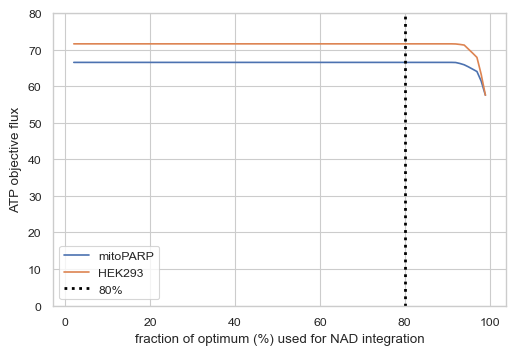

In [10]:
fig, ax = pp.subplots()
ax.plot(fva_fracs[1:-1], atp_ml[1:-1], label='mitoPARP')
ax.plot(fva_fracs[1:-1], atp_cl[1:-1], label='HEK293')
ax.set_ylabel('ATP objective flux')
ax.set_xlabel(xlabel)
ax.axvline(80., color='black', linestyle=':', linewidth=2., label='80%')
ax.set_ylim(0, 80)
ax.legend();
pp.tight_layout()
fig.savefig(figpath / 'fraction_of_optimum_nad_atp.svg', transparent=True)

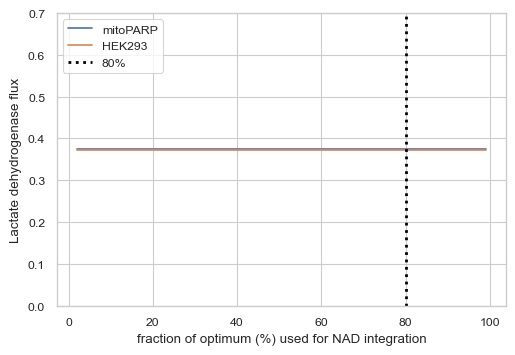

In [11]:
rxn = 'LDH_L'
rxn_ml = [s.fluxes[rxn]+.0025 for s in sols_ml] # adding a tiny amount to make clearer the lines are both in the same place
rxn_cl = [s.fluxes[rxn] for s in sols_cl]

fig, ax = pp.subplots()
ax.plot(fva_fracs[1:-1], rxn_ml[1:-1], label='mitoPARP')
ax.plot(fva_fracs[1:-1], rxn_cl[1:-1], label='HEK293')
ax.set_ylabel('Lactate dehydrogenase flux')
ax.set_xlabel(xlabel)
ax.set_ylim(0., .7)
ax.axvline(80., color='black', linestyle=':', linewidth=2., label='80%')
ax.legend()
pp.tight_layout()
fig.savefig(figpath / 'fraction_of_optimum_nad_ldh.svg', transparent=True)

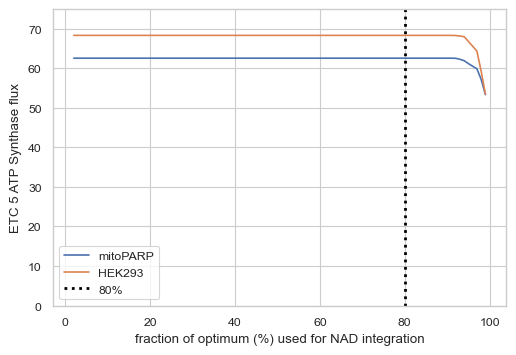

In [12]:
rxn = 'CV_MitoCore'
rxn_ml = [s.fluxes[rxn] for s in sols_ml]
rxn_cl = [s.fluxes[rxn] for s in sols_cl]

fig, ax = pp.subplots()
ax.plot(fva_fracs[1:-1], rxn_ml[1:-1], label='mitoPARP')
ax.plot(fva_fracs[1:-1], rxn_cl[1:-1], label='HEK293')
ax.set_ylabel('ETC 5 ATP Synthase flux')
ax.set_xlabel(xlabel)
ax.set_ylim(0., 75.)
ax.axvline(80., color='black', linestyle=':', linewidth=2., label='80%')
ax.legend()
pp.tight_layout()
fig.savefig(figpath / 'fraction_of_optimum_nad_c5.svg', transparent=True)